In [1]:
from collections import Counter 
from collections import defaultdict #defaultdict is used to create a dictionary of lists

In [4]:

users = [{"id": 0, "name": "Hero"},
         {"id": 1, "name": "Dunn"},
         {"id": 2, "name": "Sue"},
         {"id": 3, "name": "Chi"},
         {"id": 4, "name": "Thor"},
         {"id": 5, "name": "Clive"},
         {"id": 6, "name": "Hicks"},
         {"id": 7, "name": "Devin"},
         {"id": 8, "name": "Kate"},
         {"id": 9, "name": "Klein"}]

interests = [(0, "Hadoop"), (0, "Big data"), (0,"HBase"), (0, "Java"),
            (0, "Spark"), (0, "Storm"), (0, "Cassandra"),
            (1, "NoSQL"), (1, "MongoDB"), (1, "Cassandra"), (1, "HBase"),
            (1, "Postgres"), (2, "Python"), (2, "Scikit-learn"),(2, "scipy"),
            (2, "numpy"), (2, "statsmodels"), (2, "pandas"),(3, "R"), (3, "Python"),
            (3, "statistics"), (3, "regression"), (3, "probability"),
            (4, "machine learning"), (4, "regression"), (4, "decision trees"),
            (4, "libsvm"), (5, "Python"), (5, "R"),(5, "Hava"),(5, "C++"),
            (5, "Haskell"), (5, "programming languages"), (6, "statistics"),
            (6, "probability"), (6, "mathematics"), (6, "theory"),
            (7, "machine learning"), (7, "scikit-learn"), (7, "Mahout"),
            (7, "neural networks"), (8, "neural networks"), (8, "deep learning"),
            (8, "Big data"), (8, "artificial intelligence"), (9, "Hadoop"),
            (9, "Java"), (9, "Mapreduce"), (9, "Big data")]

friendships = [(0, 1), (0, 2), (1, 2), (1, 3), (2, 3), (3, 4),
               (4, 5), (5, 6), (5, 7), (6, 8), (7, 8), (8, 9)]




In [5]:
for user in users:
    user["friends"] = []

for i, j in friendships:
    users[i]["friends"].append(users[j])
    users[j]["friends"].append(users[i])

def number_of_friends(z):
    return len(z["friends"])

for user in users:
    print(user["id"], user["name"], number_of_friends(user))

0 Hero 2
1 Dunn 3
2 Sue 3
3 Chi 3
4 Thor 2
5 Clive 3
6 Hicks 2
7 Devin 2
8 Kate 3
9 Klein 1


In [6]:
total_connections = sum(number_of_friends(user) for user in users) # This is to find the total number of connections
num_users = len(users)
avg_connections = total_connections / num_users
print(avg_connections)

2.4


In [5]:
num_friends_by_id = [(user["id"], number_of_friends(user))
                     for user in users]
sorted(num_friends_by_id,
       key=lambda x: x[1],
       reverse=True)

print(num_friends_by_id)

[(0, 2), (1, 3), (2, 3), (3, 3), (4, 2), (5, 3), (6, 2), (7, 2), (8, 3), (9, 1)]


In [6]:
def friends_of_friends_ids_bad(user):
    return[foaf["id"]
           for friend in user["friends"]
           for foaf in friend["friends"]
           ]
    
print(friends_of_friends_ids_bad(users[0]))

[0, 2, 3, 0, 1, 3]


In [7]:
def not_the_same(user1, other_user):
    return user1["id"] != other_user["id"]
def not_friends(user, other_user):
    return all(not_the_same(friend, other_user)
               for friend in user["friends"])

def friends_of_friends_ids(user):
    return Counter(foaf["id"]
                   for friend in user["friends"]
                   for foaf in friend["friends"]
                   if not_the_same(user, foaf)
                   and not_friends(user, foaf))

id = int(input())
print(friends_of_friends_ids(users[id]))


 3
Counter({0: 2, 5: 1})
Counter({0: 2, 5: 1})
Counter({0: 2, 5: 1})


Counter({0: 2, 5: 1})


Counter({0: 2, 5: 1})


Counter({0: 2, 5: 1})


In [9]:
def data_scientists_who_like(target_interest):
    return [user_id
            for user_id, user_interest in interests
            if user_interest == target_interest]
    
user_ids_by_interest = defaultdict(list)
for user_id, interest in interests:
    user_ids_by_interest[interest].append(user_id)
    
print(user_ids_by_interest)

interests_by_user_id = defaultdict(list)
for user_id, interest in interests:
    interests_by_user_id[user_id].append(interest)
print(interests_by_user_id)


defaultdict(<class 'list'>, {'Hadoop': [0, 9], 'Big data': [0, 8, 9], 'HBase': [0, 1], 'Java': [0, 9], 'Spark': [0], 'Storm': [0], 'Cassandra': [0, 1], 'NoSQL': [1], 'MongoDB': [1], 'Postgres': [1], 'Python': [2, 3, 5], 'Scikit-learn': [2], 'scipy': [2], 'numpy': [2], 'statsmodels': [2], 'pandas': [2], 'R': [3, 5], 'statistics': [3, 6], 'regression': [3, 4], 'probability': [3, 6], 'machine learning': [4, 7], 'decision trees': [4], 'libsvm': [4], 'Hava': [5], 'C++': [5], 'Haskell': [5], 'programming languages': [5], 'mathematics': [6], 'theory': [6], 'scikit-learn': [7], 'Mahout': [7], 'neural networks': [7, 8], 'deep learning': [8], 'artificial intelligence': [8], 'Mapreduce': [9]})
defaultdict(<class 'list'>, {0: ['Hadoop', 'Big data', 'HBase', 'Java', 'Spark', 'Storm', 'Cassandra'], 1: ['NoSQL', 'MongoDB', 'Cassandra', 'HBase', 'Postgres'], 2: ['Python', 'Scikit-learn', 'scipy', 'numpy', 'statsmodels', 'pandas'], 3: ['R', 'Python', 'statistics', 'regression', 'probability'], 4: ['mac

In [8]:
#This function is interested in finding the most common interests with a user

def most_common_interests_with(user):
    return Counter(interested_user_id
                   for interest in interests_by_user_id[user["id"]]
                   for interested_user_id in user_ids_by_interest[interest]
                   if interested_user_id != user["id"])


In [8]:
salaries_and_tenures = [(83000, 8.7), (88000, 8.1),
                        (48000, 0.7), (76000, 6),
                        (69000, 6.5), (76000, 7.5),
                        (60000, 2.5), (83000, 10),
                        (48000, 1.9), (63000, 4.2)]

#Now we are interested in relation between tenure and salaries
salary_by_tenure = defaultdict(list)

for salary, tenure in salaries_and_tenures:
    salary_by_tenure[tenure].append(salary)
    
average_salary_by_tenure = {
    tenure : sum(salaries) / len(salaries)
    for tenure, salaries in salary_by_tenure.items()
}

print(average_salary_by_tenure)

{8.7: 83000.0, 8.1: 88000.0, 0.7: 48000.0, 6: 76000.0, 6.5: 69000.0, 7.5: 76000.0, 2.5: 60000.0, 10: 83000.0, 1.9: 48000.0, 4.2: 63000.0}


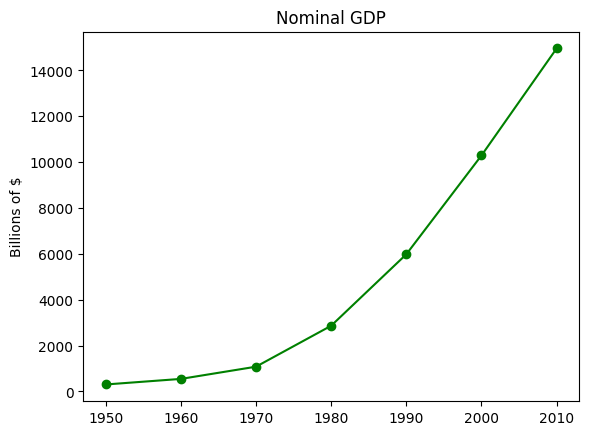

In [1]:
from matplotlib import pyplot as plt #type: ignore

years = [1950, 1960, 1970, 1980, 1990, 2000, 2010]
gdp = [300.2, 543.3, 1075.9, 2862.5, 5979.6, 10289.7, 14958.3]


plt.plot(years, gdp, color='green', marker='o', linestyle='solid')
plt.title("Nominal GDP")

plt.ylabel("Billions of $")
plt.show()

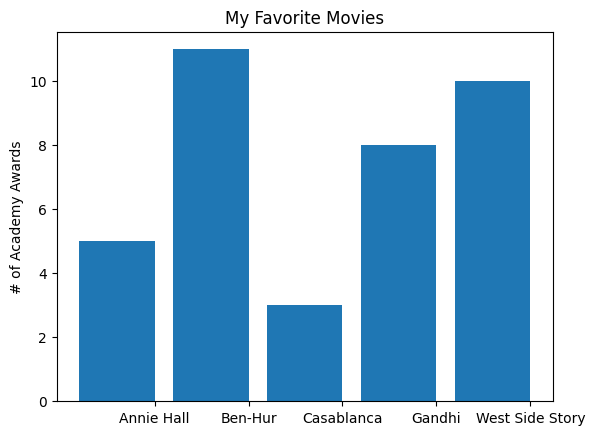

In [10]:
movies = ["Annie Hall", "Ben-Hur", "Casablanca", "Gandhi", "West Side Story"]
num_oscars = [5, 11, 3, 8, 10]

xs = [i + 0.1 for i, _ in enumerate(movies)]

plt.bar(xs, num_oscars)
plt.ylabel("# of Academy Awards")
plt.title("My Favorite Movies")
plt.xticks([i + 0.5 for i, _ in enumerate(movies)], movies)
plt.show()

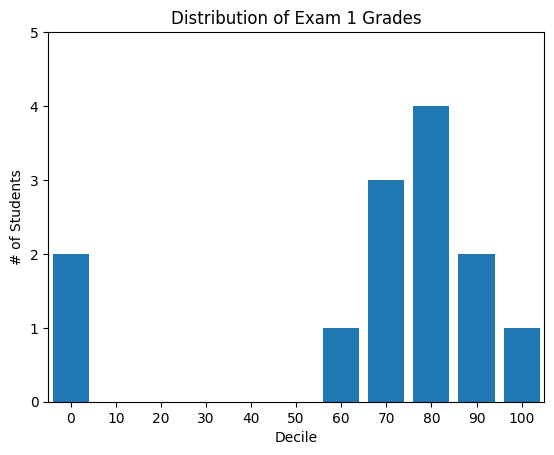

In [11]:
from collections import Counter

grades = [83, 95, 91, 87, 70, 0, 85, 82, 100, 67, 73, 77, 0]
decile = lambda grade: grade // 10 * 10
histogram = Counter(decile(grade) for grade in grades)

plt.bar([x for x in histogram.keys()], histogram.values(), 8)
plt.axis([-5, 105, 0, 5])
plt.xticks([10 * i for i in range(11)])
plt.xlabel("Decile")
plt.ylabel("# of Students")
plt.title("Distribution of Exam 1 Grades")
plt.show()

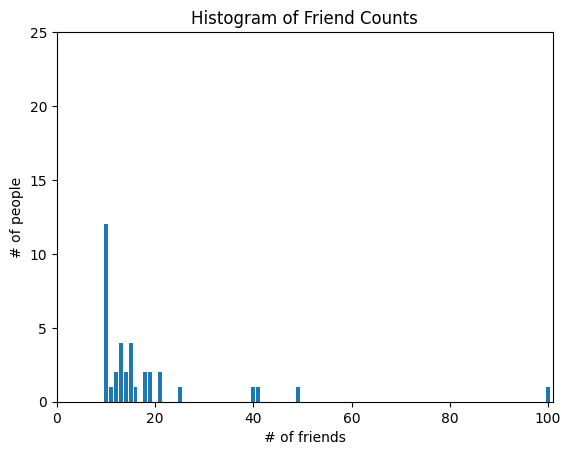

In [12]:
num_friends = [100, 49, 41, 40, 25, 21, 21, 19, 19, 18, 18, 16, 15, 15, 15, 15, 14, 14, 13, 13, 13, 13, 12, 12, 11, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10]
friend_counts = Counter(num_friends)
xs = range(101)
ys = [friend_counts[x] for x in xs]
plt.bar(xs, ys)
plt.axis([0, 101, 0, 25])
plt.title("Histogram of Friend Counts")
plt.xlabel("# of friends")
plt.ylabel("# of people")
plt.show()

In [13]:
from __future__ import division

def mean(x):
    return sum(x) / len(x)

mean(num_friends)



18.43243243243243

In [14]:
#Correlation
from math import sqrt
import math
daily_minutes = [1, 68.77, 51.25, 52.08, 38.36, 44.54, 57.13, 51.4, 41.42, 31.22, 34.76, 54.01, 38.79, 47.59, 49.64, 43.11, 55.10, 52.38, 52.96, 42.23, 43.32, 46.15, 47.93, 47.28, 51.18, 46.34, 48.25, 53.88, 50.27, 47.17, 46.58, 47.83, 50.87, 50.10, 51.82, 49.65, 32.92, 52.30, 47.93, 51.28, 53.87, 52.38, 52.19, 47.83, 52.10, 51.38, 47.41, 49.69, 51.58, 47.66, 49.63, 51.50, 47.43]
def de_mean(x):
    x_bar = mean(x)
    return [x_i - x_bar for x_i in x]

def dot(v, w):
    return sum(v_i * w_i for v_i, w_i in zip(v, w))

def sum_of_squares(v):
    return dot(v, v)

def variance(x):
    n = len(x)
    deviations = de_mean(x)
    return sum_of_squares(deviations) / (n - 1)

def standard_deviation(x):
    return math.sqrt(variance(x))

def covariance(x, y):
    n = len(x)
    return dot(de_mean(x), de_mean(y)) / (n - 1)

print(covariance(num_friends, daily_minutes))

def correlation(x, y):
    stdev_x = standard_deviation(x)
    stdev_y = standard_deviation(y)
    if stdev_x > 0 and stdev_y > 0:
        return covariance(x, y) / stdev_x / stdev_y
    else:
        return 0

print(correlation(num_friends, daily_minutes))


-85.34256756756757
-0.5794320010124864


0.3989422804014327


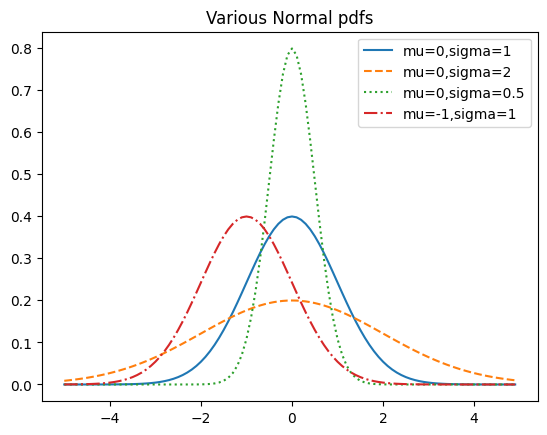

0.5


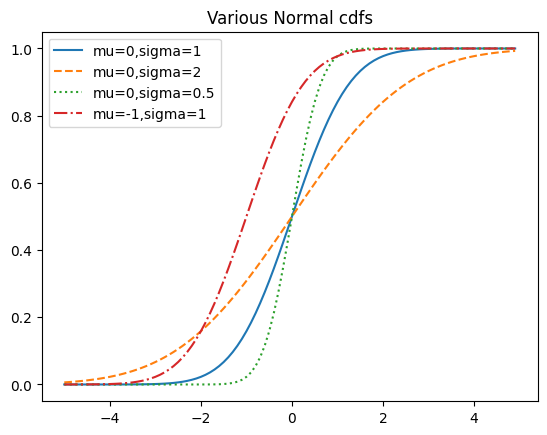

In [15]:
#this is the normal distribution

from math import * 
from matplotlib import pyplot as plt #type: ignore

def normal_pdf(x, mu=0, sigma=1):
    sqrt_two_pi = sqrt(2 * pi)
    return (exp(-0.5 * ((x - mu) / sigma) ** 2)) / (sigma * sqrt_two_pi)

print(normal_pdf(0))

xs = [x / 10.0 for x in range(-50, 50)]

xs = [x / 10.0 for x in range(-50, 50)]
plt.plot(xs,[normal_pdf(x,sigma=1) for x in xs],'-',label='mu=0,sigma=1')
plt.plot(xs,[normal_pdf(x,sigma=2) for x in xs],'--',label='mu=0,sigma=2')
plt.plot(xs,[normal_pdf(x,sigma=0.5) for x in xs],':',label='mu=0,sigma=0.5')
plt.plot(xs,[normal_pdf(x,mu=-1) for x in xs],'-.',label='mu=-1,sigma=1')
plt.legend()
plt.title("Various Normal pdfs")
plt.show()


def normal_cdf(x, mu=0, sigma=1):
    return (1 + erf((x - mu) / sqrt(2) / sigma)) / 2

print(normal_cdf(0))

xs = [x / 10.0 for x in range(-50, 50)]
plt.plot(xs,[normal_cdf(x,sigma=1) for x in xs],'-',label='mu=0,sigma=1')
plt.plot(xs,[normal_cdf(x,sigma=2) for x in xs],'--',label='mu=0,sigma=2')
plt.plot(xs,[normal_cdf(x,sigma=0.5) for x in xs],':',label='mu=0,sigma=0.5')
plt.plot(xs,[normal_cdf(x,mu=-1) for x in xs],'-.',label='mu=-1,sigma=1')
plt.legend()
plt.title("Various Normal cdfs")
plt.show()

def inverse_normal_cdf(p, mu=0, sigma=1, tolerance=0.00001):

    if mu != 0 or sigma != 1:
        return mu + sigma * inverse_normal_cdf(p, tolerance=tolerance)

    low_z, low_p = -10.0, 0
    hi_z, hi_p = 10.0, 1
    while hi_z - low_z > tolerance:
        mid_z = (low_z + hi_z) / 2
        mid_p = normal_cdf(mid_z)
        if mid_p < p:
            low_z, low_p = mid_z, mid_p
        elif mid_p > p:
            hi_z , hi_p = mid_z, mid_p
        else:
            break

    return mid_z
    

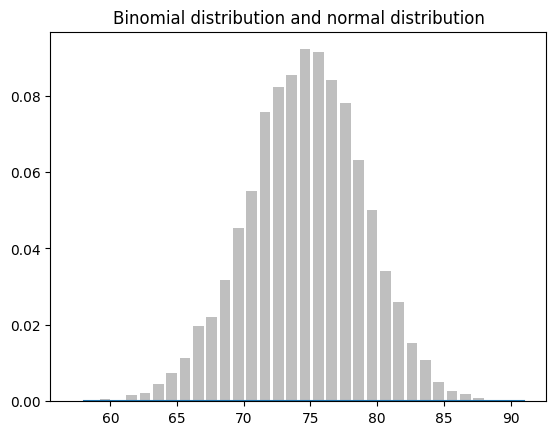

In [16]:
#This is about central limit theorem
from math import *
from matplotlib import pyplot as plt #type: ignore
import random as rd
def bernoulli_trial(p: float) -> int:
    return 1 if rd.random() < p else 0

def binomial(n: int, p: float) -> int:
    return sum(bernoulli_trial(p) for _ in range(n))

def make_hist(p, n, num_points):

    data = [binomial(n, p) for _ in range(num_points)]

    histogram = Counter(data)
    plt.bar([x - 0.4 for x in histogram.keys()], 
            [v / num_points for v in histogram.values()],
            0.8,
           color='0.75')

    mu = p * n
    sigma = sqrt(n * p * (1 - p))

    xs = range(min(data), max(data) + 1)
    ys = [normal_cdf(i - 0.5, mu, sigma) - normal_cdf(i - 0.5, mu, sigma)
         for i in xs]
    plt.plot(xs, ys)
    plt.title("Binomial distribution and normal distribution")
    plt.show()

make_hist(0.75, 100, 10000)

In [17]:
#assumption and hypothesis testing

from math import *
from matplotlib import pyplot as plt #type: ignore

def normal_approximation_to_binomial(n, p):
    mu = p * n
    sigma = sqrt(p * (1 - p) * n)
    return mu, sigma

normal_probability_below = normal_cdf

def normal_probability_above(lo, mu=0, sigma=1):
    return 1 - normal_cdf(lo, mu, sigma)

def normal_probability_between(lo, hi, mu=0, sigma=1):
    return normal_cdf(hi, mu, sigma) - normal_cdf(lo, mu, sigma)

def normal_probability_outside(lo, hi, mu=0, sigma=1):
    return 1 - normal_probability_between(lo, hi,  mu, sigma)

def normal_upper_bound(probability, mu=0, sigma=1):
    return inverse_normal_cdf(probability, mu, sigma)

def normal_lower_bound(probability, mu=0, sigma=1):
    return inverse_normal_cdf(1 - probability, mu, sigma)

def normal_two_sided_bounds(probability, mu=0, sigma=1):
    tail_probability = (1 - probability) / 2

    upper_bound = normal_lower_bound(tail_probability, mu, sigma)
    lower_bound = normal_upper_bound(tail_probability, mu, sigma)
    return lower_bound, upper_bound

mu_0, sigma_0 = normal_approximation_to_binomial(1000, 0.5)
print(normal_two_sided_bounds(0.95, mu_0, sigma_0))

(469.01026640487555, 530.9897335951244)


In [18]:
#Now we consider the power, which means that we need to know the implication of fail initial assumption

lo, hi = normal_two_sided_bounds(0.95, mu_0, sigma_0)

mu_1, sigma_1 = normal_approximation_to_binomial(1000, 0.55)

type2_probability = normal_probability_between(lo, hi, mu_1, sigma_1)
power = 1 - type2_probability
print(power)

#One-tailed test, we only care about one side outcome
hi = normal_upper_bound(0.95, mu_0, sigma_0)
print(hi)

type_2_probability = normal_probability_below(hi, mu_1, sigma_1)
power = 1 - type_2_probability
print(power)

0.8865480012953671
526.0073585242053
0.9363794803307173


In [19]:
import random

def two_sided_p_value(x, mu=0, sigma=1):
    if x >= mu:
        return 2 * normal_probability_above(x, mu, sigma)
    else:
        return 2 * normal_probability_below(x, mu, sigma)

print(two_sided_p_value(529.5, mu_0, sigma_0))

extreme_value_count = 0
for _ in range(100000):
    num_heads = sum(1 if random.random() < 0.5 else 0
                    for _ in range(1000))
    if num_heads >= 530 or num_heads <= 470:
        extreme_value_count += 1

print(extreme_value_count / 100000)
print(two_sided_p_value(531.5, mu_0, sigma_0))

0.06207721579598835
0.06236
0.046345287837786575


In [20]:
#Confidence interval
from math import sqrt

"""p_hat = 525 / 1000
mu = p_hat
sigma = math.sqrt(p_hat * (1 - p_hat) / 1000)
print(sigma)"""

p_hat = 540 / 1000
mu = p_hat
sigma = math.sqrt(p_hat * (1 - p_hat) / 1000)

'''Now we can see 525 is different from 540, if we assume the probability is 0.5 and there is 5% fail'''
normal_two_sided_bounds(0.95, mu, sigma)




(0.5091095927295919, 0.5708904072704082)

In [21]:
#P-hacking
import random

def run_experiment():
    return [random.random() < 0.5 for _ in range(1000)]

def reject_fairness(experiment):
    num_heads = len([flip for flip in experiment if flip])
    return num_heads < 469 or num_heads > 531

random.seed(0)
experiments = [run_experiment() for _ in range(1000)]
num_rejections = len([experiment
                    for experiment in experiments
                    if reject_fairness(experiment)])
print(num_rejections)  
    

46


In [22]:
#A/B testing 
from math import sqrt

def estimated_parameters(N, n):
    p = n / N
    sigma = math.sqrt(p * (1 - p) / N)
    return p, sigma

def a_b_test_statistic(N_A, n_A, N_B, n_B):
    p_A, sigma_A = estimated_parameters(N_A, n_A)
    p_B, sigma_B = estimated_parameters(N_B, n_B)
    return (p_B - p_A) / math.sqrt(sigma_A ** 2 + sigma_B ** 2)

z1 = a_b_test_statistic(1000, 200, 1000, 180)
two_sided_p_value(z1)

z2 = a_b_test_statistic(1000, 200, 1000, 150)
two_sided_p_value(z2)

print(z1)
print(two_sided_p_value(z1))
print(z2)
print(two_sided_p_value(z2))

-1.1403464899034472
0.254141976542236
-2.948839123097944
0.003189699706216853


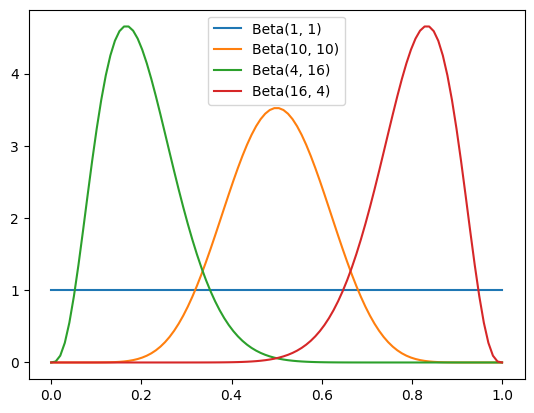

In [23]:
#Bayesian Estimation
from math import gamma
from matplotlib import pyplot as plt
import numpy as np

def B(alpha, beta):
    return math.gamma(alpha) * math.gamma(beta) / math.gamma(alpha + beta)

def beta_pdf(x, alpha, beta):
    if x < 0 or x > 1:
        return 0
    return x ** (alpha - 1) * (1 - x) ** (beta - 1) / B(alpha, beta)

xs = np.linspace(0, 1, 100)
plt.plot(xs,[beta_pdf(x, 1, 1) for x in xs], '-', label = "Beta(1, 1)")
plt.plot(xs,[beta_pdf(x, 10, 10) for x in xs], '-', label = "Beta(10, 10)")
plt.plot(xs,[beta_pdf(x, 4, 16) for x in xs], '-', label = "Beta(4, 16)")
plt.plot(xs,[beta_pdf(x, 16, 4) for x in xs], '-', label = "Beta(16, 4)")
plt.legend()
plt.show()

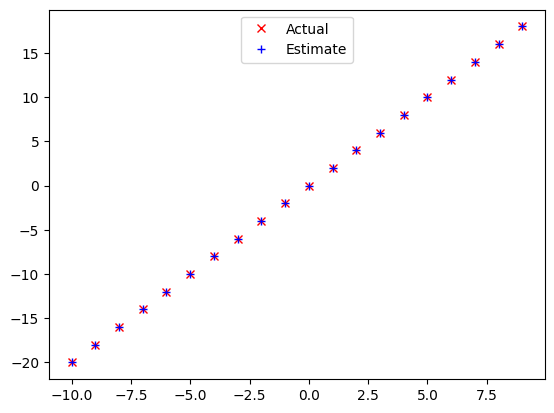

In [1]:
#Concept of gradient descent
from functools import partial 
from matplotlib import pyplot as plt

#A simple example that a function would output a value with a input vector
#def sum_of_squares(v):
#    return sum(v ** 2 for v_i in v)

#gradient estimation
def difference_quotient(f, x, h):
    return(f(x + h) - f(x)) / h

def square(x):
    return x * x

def derivative(x):
    return 2 * x

derivative_estimate = partial(difference_quotient, square, h=0.00001)
x = range(-10, 10)
plt.plot(x, list(map(derivative, x)), 'rx', label = 'Actual')
plt.plot(x, list(map(derivative_estimate, x)), 'b+', label = 'Estimate')
plt.legend(loc=9)
plt.show()

def partial_difference_quotient(f, v, i, h):
    w = [v_j + (h if j==i else 0)
         for j, v_j in enumerate(v)]

    return (f(w) - f(h)) / h

def estimate_gradient(f, v, h=0.0001):
    return [partial_difference_quotient(f, v, i, h)
            for i, _ in enumerate(v)]


    

In [6]:
#using gradient
import random
from scipy.spatial import distance

def step(v, direction, step_size):
    return [v_i + step_size * direction_i
           for v_i, direction_i in zip(v, direction)]

def sum_of_squares_gradient(v):
    return [2 * v_i for v_i in v]

v = [random.randint(-10,10) for i in range(3)]

tolerance = 0.0000001

while True:
    gradient = sum_of_squares_gradient(v)
    next_v = step(v, gradient, -0.01)
    if distance.euclidean(next_v, v) < tolerance:
        break
    v = next_v

print(v)

#choosing a step size is so interesting, there are mainly two ways to choose, one is to use fixed size, the other is to decrease by time
step_sizes = [100, 10, 1, 0.1, 0.01, 0.001, 0.0001, 0.00001]


#Some step may cause invalid output, so we need to construct a function which return infinity for a invalid input
def safe(f):
    def safe_f(*args, **kwargs):
        try:
            return f(*args, **kwargs)
        except:
            return float('inf')
    return safe_f

safe(step_sizes)

[4.163601529674763e-06, -1.3878671765582534e-06, -2.3131119609304243e-06]


<function __main__.safe.<locals>.safe_f(*args, **kwargs)>

In [8]:
#General

#Way of gradient descent
def minimize_batch(target_fn, gradient_fn, theta_0, tolerance=0.000001):

    step_sizes = [100, 10, 1, 0.1, 0.01, 0.001, 0.0001, 0.00001]

    theta = theta_0
    target_fn = safe(target_fn)
    value = target_fn(theta)

    while True:
        gradient = gradient_fn(theta)
        next_thetas = [step(theta, gradient, -step_size)
                        for step_size in step_sizes]
    next_theta = min(next_thetas, key=target_fn)
    next_value = target_fn(next_theta)

    if abs(value - next_value) < tolerance:
        return theta
    else:
        theta, value = next_theta, next_value
        

In [ ]:
#It is time wasted that calculate the gradient of whole data set
#Now the error functions are usually addictive, means the sum of the approximated err

#stochastic gradient descent

def in_random_order(data):
    """generate that returns the elements of data in random order"""
    indexes = [i for i, _ in enumerate(data)]
    random.shuffle(indexes)
    for i in indexes:
        yield data[i]


def minimize_stochastic(target_fn, gradient_fn, x, y, theta_0, alpha_0=0.01):
    data = zip(x,y)
    theta = theta_0
    alpha = alpha_0
    min_theta, min_value = None, float("inf")
    iterations_with _no_improvement = 0

    #if there is no improvement after 100 iterations
    while iterations_with _no_improvement < 100:
        value = sum( target_fn(x_i, y_i, theta) for x_i, y_i in data )

        if value < min_value:
            #if the nem min is found, remember it
            #back to the initial step size
            min_theta, min_value = theta, value
            iterations_with_no_improvement = 0
            alpha = alpha_0
        else:
            #try to minimize the step size, otherwise no improvement
            iterations_with_no_improvement += 1
            alpha *= 0.9

        # step further in every data point
        for x_i, y_i in in_random_order(data):
            gradient_i = gradient_fn(x_i, y_i, theta)
            theta = vector_subtract(theta, scalar_nultiply(alpha, gradient_i_)

    return min_theta

def maximize_stochastic(target_fn, gradient_fn, x, y, theta_0, alpha_0=0.01):

    return minimize_stochastic(negative(target_fn),
                               negative_all(gradient),
                               x, y, theta_0, alpha_0)

      
    